In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
wine=pd.read_csv('D:\\Data Science\\netzwrek\\ML\\wine.csv')

In [116]:
wine.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [117]:
wine.tail()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [119]:
wine['Wine'].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

In [120]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Wine                    178 non-null int64
Alcohol                 178 non-null float64
Malic.acid              178 non-null float64
Ash                     178 non-null float64
Acl                     178 non-null float64
Mg                      178 non-null int64
Phenols                 178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid.phenols    178 non-null float64
Proanth                 178 non-null float64
Color.int               178 non-null float64
Hue                     178 non-null float64
OD                      178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [126]:
X=wine.iloc[:,1:]
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [133]:
y = wine.iloc[:,0]
y.head()


0    1
1    1
2    1
3    1
4    1
Name: Wine, dtype: int64

In [134]:
#data Normalization
from sklearn import preprocessing
X =preprocessing.StandardScaler().fit_transform(X)

In [135]:
X[0:4]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383]])

In [137]:
#Train Test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [138]:
y_test.shape

(54,)

In [139]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors = 3)
knnmodel.fit(X_train,y_train)
ypredict = knnmodel.predict(X_test)

In [140]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,ypredict)
acc

0.9814814814814815

In [141]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypredict)
cm

array([[23,  0,  0],
       [ 1, 18,  0],
       [ 0,  0, 12]], dtype=int64)

In [142]:
cm1 = pd.DataFrame(data=cm,index=['1','2','3'],columns=['1','2','3'])
cm1

,1,2,3
1,23,0,0
2,1,18,0
3,0,0,12


In [143]:
prediction_output =pd.DataFrame(data=[y_test.values,ypredict],index=['y_test','ypredict'])

In [144]:
prediction_output.transpose()

,y_test,ypredict
0,3,3
1,2,2
2,1,1
3,2,2
4,1,1
5,3,3
6,2,2
7,1,1
8,3,3
9,2,2


In [145]:
ks =21
mean_acc = np.zeros((ks-1))

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)
    

In [146]:
print(mean_acc)

[0.98148148 0.98148148 0.98148148 0.96296296 0.98148148 0.98148148
 0.98148148 0.98148148 0.98148148 0.98148148 0.98148148 0.98148148
 0.98148148 0.98148148 0.98148148 0.98148148 0.98148148 0.96296296
 0.98148148 0.96296296]


In [147]:
print("The best accuracy was with",mean_acc.max(),"with k=",mean_acc.argmax()+1)

The best accuracy was with 0.9814814814814815 with k= 1


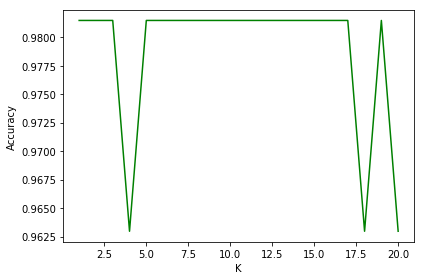

In [148]:
plt.plot(range(1,ks),mean_acc,'g')
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.tight_layout()
plt.show()